<div dir="rtl" align="center">

به نام خداوند بخشنده مهربان

<h1>
پروژه پایانی جبر خطی
</h1>

حمیدرضا ربیعی، مریم رمضانی

</div>

<div dir="rtl">

نام و نام‌خانوادگی:‌ 
علی نظری
    <br>
شماره دانشجویی: 
99102401
</div>

<div dir="rtl">
    <h1>
        چهره‌های ویژه
    </h1>
</div>

<div dir="rtl" style="font-size:18px"> 
    در الگوریتم‌های تشخیص چهره، درون عکس‌ها به دنبال تشخیص خصوصیت‌های خاص عکس بودند. به طور مثال چشم، بینی و ...
     که می‌توانست حاکی از وجود چهره در عکس باشند. واضح است که چنین روش‌هایی هزینه‌بر و در موارد زیادی نادقیق هستند.
    <br/>
    <br/>
    در این پروژه به دنبال پیاده سازی روشی هستیم که این تشخیص را به گونه‌ای دیگر انجام می‌دهد.
    در این روش مانند روش قبل به دنبال پیدا کردن مشخصه‌هایی هستیم که یک چهره را تشخیص میدهند ، اما این مشخصه‌ها را با روش دیگری می‌خواهیم پیاده کنیم.
</div>

## Load Data (10 points)



<br/>

<div dir="rtl" style="font-size:18px">
    قبل از اینکه درباره پیاده‌سازی این الگوریتم صحبت کنیم لازم است داده‌هایی که مورد استفاده قرار می‌دهیم را داشته باشیم.
    داده‌های مورد نظر در زیپ مربوطه همراه این نوتبوک قرار گرفته‌است.
    <br/>
    دقت کنید که این دیتاست شامل تصاویر مربوط به چهره 200 فرد است.
    هر کدام از افراد دو عکس یکی حالت طبیعی و یکی خندان دارند.
    پس در کل 400 عکس داریم.
    ابتدا تمام عکس‌ها را لود کنید و داشته باشید که در ادامه به آن‌ها نیاز پیدا می‌کنید.
    <br/>
    <br/>
    در نهایت برای این که مطمئن شوید که دیتا را درست لود کرده‌اید،
    به طور رندوم 5 تا از این چهره‌ها را در دو حالت خندان و عادی نمایش دهید. برای اینکار میتوانید از تابع imshow از لایبرری matplotlib استفاده کنید.
    <br/>
</div>

In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import matplotlib.pyplot as plt
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        if img is not None:
            images.append(img)
    return images

images = load_images_from_folder("./data")
print(len(images))
print(images[0].shape)
print(images[0])

400
(193, 162)
[[190 202 216 ... 152 151 148]
 [186 207 219 ... 155 152 148]
 [190 207 219 ... 152 148 141]
 ...
 [  2   2   2 ...  27  27  21]
 [  3   3   3 ...  26  26  20]
 [  3   3   3 ...  23  23  19]]


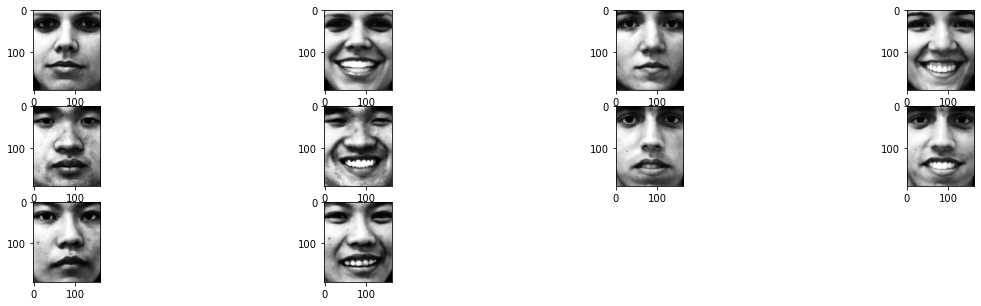

In [3]:
plt.figure(figsize=[20,5])
plt.subplot(341);plt.imshow(images[0], cmap='gray');
plt.subplot(342);plt.imshow(images[1], cmap='gray');
plt.subplot(343);plt.imshow(images[10], cmap='gray');
plt.subplot(344);plt.imshow(images[11], cmap='gray');
plt.subplot(345);plt.imshow(images[20], cmap='gray');
plt.subplot(346);plt.imshow(images[21], cmap='gray');
plt.subplot(347);plt.imshow(images[30], cmap='gray');
plt.subplot(348);plt.imshow(images[31], cmap='gray');
plt.subplot(349);plt.imshow(images[40], cmap='gray');
plt.subplot(3, 4, 10);plt.imshow(images[41], cmap='gray');

<br/>
<div dir="rtl" style="font-size:18px">
حال فعلا تنها با عکس‌های چهره طبیعی کار داریم.
    190 تا عکس اول از آن را در نظر بگیرید
     هر کدام را به صورت یک وکتور تک بعدی $\Gamma_i$ در بیاورید.
     در نهایت ماتریس حاصل از داده‌ها که $\Gamma$ است
    را تشکیل دهید. دقت کنید که ستون $i$ ام این ماتریس
    $\Gamma_i$ است.
    <br/>
<div/>

In [4]:
import numpy as np

normal_190_faces = []
counter = 0
for i in images:
    if counter % 2 == 0:
        normal_190_faces.append(i.reshape(-1))
    counter += 1
    if len(normal_190_faces) == 190:
        break
print(len(normal_190_faces))
print(normal_190_faces[0].shape)
print(normal_190_faces[0])
print("-----------------------------------------------------------")
normal_190_faces = np.array(normal_190_faces)
normal_190_faces = normal_190_faces.T
print(normal_190_faces)
print(normal_190_faces.shape)

190
(31266,)
[190 202 216 ...  23  23  19]
-----------------------------------------------------------
[[190 161 190 ... 213 203  12]
 [202 185 190 ... 217 213  14]
 [216 200 204 ... 220 223  12]
 ...
 [ 23   3  13 ...  34  62  69]
 [ 23   2  13 ...  18  59  64]
 [ 19   1   9 ...  18  59  61]]
(31266, 190)


# PCA 
<br/>
<br/>

<div dir="rtl" style="font-size:18px">
 <br/>
    الگوریتم Principal Component Analysis یا همان PCA یک روش برای کاهش ابعاد داده‌ی موردنظر است که در حوزه یادگیری ماشین و علوم داده کاربرد فراوان دارد.
با کاهش ابعاد سادگی را افزایش داده و در عین حال همانگونه که انتظار می‌رود ورودی با کاهش دقت همراه خواهد شد. در الگوریتم PCA تلاش بر این است که در عین کاهش ابعاد، کمترین میزان اطلاعات را از دست بدهیم.
    پیشنهاد می‌شود قبل از انجام پروژه مطالعات بیشتری در رابطه با این الگوریتم داشته باشید.
<br/>
    <br/>
در ادامه‌ی بخش‌ها می‌خواهیم PCA را پیاده سازی کنیم.
گفتیم که برای تشخیص چهره‌ها به دنبال پیدا کردن مشخصه‌های خاص درون هر عکس هستیم. این مشخصه‌ها ممکن است ترکیبی از چند ویژگی درون عکس باشند، یا حتی ویژگی‌هایی 
    باشند که به طور طبیعی قادر به تشخیص آنها نیستیم.
    در اینجا با استفاده از الگوریتم PCA در تلاش برای پیدا کردن همچین ویژگی‌هایی هستیم.
    <br/>
    <br/>
با PCA قرار است کار زیر را انجام دهیم :
    <br/>
    <br/>
فرض کنید هر عکس به صورت یک آرایه دو بعدی $N\times M$ باشد ، بنابراین هر عکس را می‌توان با یک بردار به طول $N\times M$ نشان دهیم، پس در یک فضای $N\times M$ بعدی قرار دارد. فرض کنید $W$ فضایی باشد که تمامی عکس‌های صورت در آن قرار دارند ، اسم آن را Face Space بگذارید. در اینجا به دنبال پیدا کردن K بردار عمود بر هم هستیم که فضای $W$ را Span می‌کنند.
    <div/>

## Mean image (5 points)

<div dir="rtl" style="font-size:18px">
    
<div/>

<div dir="rtl" style="font-size:18px">
    در این قسمت برای نرمالایز کردن نیاز به 
    mean image
    داریم.
    آن را بدست آورید و تصویر آن را نمایش هم دهید.
    $$
    \Psi = \frac{1}{n}\sum_{i = 1}^{n} \Gamma_i
    $$
     در اینجا $n$ تعداد داده های شماست.
     دقت کنید فعلا کل کار ما بر روی 190 عکس چهره طبیعی است.
<div/>

In [5]:
rowed_normal_images = np.copy(normal_190_faces.T)
Sum = np.zeros((31266,))
for i in range(len(rowed_normal_images)):
    Sum = np.add(Sum, rowed_normal_images[i])
print(Sum)
Sum = np.divide(Sum, [190])
print(Sum)
print(Sum.shape)

[29923. 29865. 29656. ... 11336. 11533. 11760.]
[157.48947368 157.18421053 156.08421053 ...  59.66315789  60.7
  61.89473684]
(31266,)


## Cov Matrix (15 points)

<div dir="rtl" style="font-size:18px">
    
<div/>

<div dir="rtl" style="font-size:18px">
    در این قسمت باید ماتریس کوواریانس را به صورت زیر تعریف کنید :
    <br/>
    $$
    \Phi_i = \Gamma_i - \Psi
    $$
    <br/>
    $$
    A = [ \Phi_1 \Phi_2 \dots \Phi_n ]
    $$
    <br/>
    $$
    C = A A^T
    $$
    <br/>
    حال بردار ویژه های ماتریس $C$ به ترتیب بزرگی مقدار ویژه های متناظرشان ، Principal Components هایی هستند که ما می‌خواهیم.
    <br/>
    دقت کنید که ماتریس $C$ ماتریسی $(N \times M)\times (N \times M)$ می‌باشد ، سعی کنید روش بهینه ای برای پیدا کردن بردار ویژه های آن پیاده سازی کنید.
    به عنوان راهنمایی از 
    $A^T A$
    کمک بگیرید.
    <br/>
    مقدار این مقادیر ویژه را سورت کنید و درون یک نمودار نشان دهید. 
    <br/>
    بعد از سورت کردن مقدار ویژه‌ها ، بردار ویژه متناظر با 5 مقدار ویژه اول را بکشید.
    این بردار‌های ویژه را eigen face می‌نامیم.
    <br/>
     در نهایت با کمی مطالعه معیاری را انتخاب کنید و تعداد مورد نیاز از Principal Component
     ها از نظرتان را مشخص نمایید و آن تعداد بردار ویژه را انتخاب کنید.
     این عدد را K در نظر بگیرید.
     همچنین ماتریس شامل PCها را U در نظر بگیرید.
    <br/>
<div/>

In [6]:
rowed_normal_images = np.copy(normal_190_faces.T)
A = []
for i in rowed_normal_images:
    this_Q = i - Sum
    A.append(this_Q)
A = np.array(A)
A = A.T
C = np.matmul(A, A.T)
print(C)
print(C.shape)

[[1282281.47894737 1278803.86842105 1258836.16842105 ...  189683.32631579
   176685.9         182069.78947368]
 [1278803.86842105 1313486.55263158 1311185.05263158 ...  143817.78947368
   128506.5         129898.68421053]
 [1258836.16842105 1311185.05263158 1346314.65263158 ...  134533.38947368
   118401.8         117873.68421053]
 ...
 [ 189683.32631579  143817.78947368  134533.38947368 ...  932032.44210526
   947124.8         943844.2631579 ]
 [ 176685.9         128506.5         118401.8        ...  947124.8
   984937.9         992408.        ]
 [ 182069.78947368  129898.68421053  117873.68421053 ...  943844.2631579
   992408.         1019329.89473684]]
(31266, 31266)


In [7]:
import torch
A_torch = torch.from_numpy(A)
u, s, v = torch.svd(A_torch)
print(u.shape)
print(s.shape)
e_vectors = u.T
e_values = s
print(e_values)

torch.Size([31266, 190])
torch.Size([190])
tensor([3.8047e+04, 2.6736e+04, 2.4882e+04, 2.4166e+04, 2.2213e+04, 1.9637e+04,
        1.8369e+04, 1.7148e+04, 1.5682e+04, 1.4778e+04, 1.3646e+04, 1.3508e+04,
        1.3022e+04, 1.1711e+04, 1.1363e+04, 1.0946e+04, 1.0614e+04, 1.0251e+04,
        1.0052e+04, 9.6160e+03, 9.3597e+03, 9.1890e+03, 8.8464e+03, 8.2714e+03,
        8.1555e+03, 7.9451e+03, 7.6572e+03, 7.5791e+03, 7.4046e+03, 7.2819e+03,
        7.0221e+03, 6.8065e+03, 6.7751e+03, 6.6059e+03, 6.5069e+03, 6.4320e+03,
        6.2269e+03, 6.1711e+03, 6.0756e+03, 6.0031e+03, 5.8397e+03, 5.8004e+03,
        5.7205e+03, 5.7016e+03, 5.5702e+03, 5.4795e+03, 5.2858e+03, 5.1786e+03,
        5.1536e+03, 5.1320e+03, 5.0917e+03, 4.9588e+03, 4.9090e+03, 4.8427e+03,
        4.8295e+03, 4.7120e+03, 4.6680e+03, 4.5681e+03, 4.5573e+03, 4.5288e+03,
        4.4264e+03, 4.3665e+03, 4.2760e+03, 4.2635e+03, 4.2437e+03, 4.1549e+03,
        4.1382e+03, 4.0933e+03, 4.0695e+03, 3.9923e+03, 3.9421e+03, 3.9170e+0

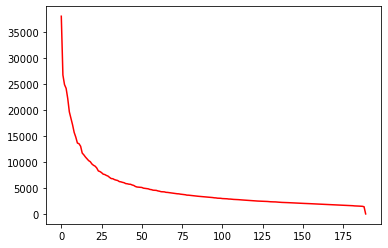

In [8]:
x_axis = range(190)
plt.plot(x_axis, e_values, color="red")

In [9]:
eigen_face = [e_vectors[0], e_vectors[1], e_vectors[2], e_vectors[3], e_vectors[4]]

<div>
    برای این بخش از لینک زیر خواندم و با توجه به فرمول های گفته شده× حدود ۱۰۰ تا پیرینسیپال کامپوننت مناسب بود
</div>
<a href="https://towardsdatascience.com/pca-102-should-you-use-pca-how-many-components-to-use-how-to-interpret-them-da0c8e3b11f0#:~:text=The%20common%20way%20of%20selecting,as%20possible%20of%20that%20threshold.">این لینک</a>

In [10]:
K = 100 # number of principal components
# I have all Principal components in e_vectors

## Reconstruction images (20 points)

<div dir="rtl" style="font-size:18px">
    در این قسمت قرار است که تابعی بنویسید که عکسی را به همراه
    Principal Components
    ‌های مورد نظر بگیرد و آن را دوباره با آن PC‌ها بازسازی کند.
    برای نحوه‌ی انجام این کار از روابط زیر کمک بگیرید.
    <br/>
    $$W = U^T(\Gamma - \Psi)$$
    $$rec = UW + \Psi$$
    <br/>
    دقت کنید که $\Gamma$
    این‌جا عکس ورودی است.
<div/>

<div dir="rtl" style="font-size:18px">
    
<div/>

In [11]:
def reconstruct_image(orig, pcs):
    """
    A function to reconstruct the original image with the given PCs
    Arguments
    orig - Original image to perform reconstruction on
    pcs  - The principal components to use for the reconstruction
    
    Returns
    recon - The reconstruction of the orig from pcs
    mse   - The Mean Squared Error of the recon with orig
    """
    recon = None
    mse = None
    
    vectorized_orig = orig.reshape(-1)
    normalized_orig = vectorized_orig - Sum
    W = np.matmul(pcs.T, normalized_orig)
    first_part_func = np.matmul(pcs, W)
    recon = np.add(first_part_func, Sum)
    
    diff = orig - recon
    diff = diff ** 2
    mse = np.sum(diff)
    
    return recon, mse

<div dir="rtl" style="font-size:18px">
    )بخش ب(
    <br/>
    حال یکی از عکس‌های دیتاستی که تا الان روی آن کار کردیم )شامل 190 عکس طبیعی( را به صورت رندم انتخاب کنید.
    برای آن عکس به ازای تمام حالت‌های انتخاب K عملیات بازسازی را انجام دهید.
    <br/>
    کمترین و بیشترین MSE را به دست آورید.
    <br/>
    MSE را برای Kای که در قسمت قبل انتخاب کردید محاسبه نمایید.
    <br/>
    سپس نمودار 
    MSE-number of largest principal components
    را رسم کنید.
    <br/>
    در مرحله‌ی بعد برای یک عکس رندم دیگر از دیتاست، عکس اصلی را همراه عکس‌هایی که از بازسازی با در نظر گرفتن 
    5 انتخاب مختلف برای K که کل محدوده تعداد 
    eigen face‌ها را پوشش دهد، 
    رسم کنید.
    <br/>
    نتایج خود را از کار‌هایی که این بخش انجام دادید و از روی خروجی‌های بدست آمده شرح دهید.
<div/>

26159021.896272525
1.254091605339657e-22


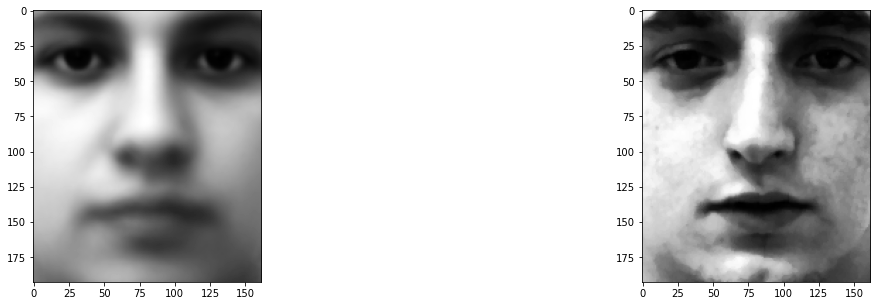

In [12]:
this_image = np.copy(images[32])
this_image = this_image.reshape(-1)
max_k = 0
max_mse = 0
max_recon = None
min_k = 200
min_mse = 9999999999
min_recon = None
k_draw = []
mse_draw = []
for i in range(1, 191):
    pcs_to_pass = e_vectors[:i]
    pcs_to_pass = pcs_to_pass.T
    pcs_to_pass = np.array(pcs_to_pass)
    recon, mse = reconstruct_image(this_image, pcs_to_pass)
    k_draw.append(i)
    mse_draw.append(mse)
    if mse > max_mse:
        max_k = i
        max_mse = mse
        max_recon = recon
    if mse < min_mse:
        min_k = i
        min_mse = mse
        min_recon = recon
print(max_mse)
print(min_mse)
to_show = max_recon.reshape(193, 162)
to_show_2 = min_recon.reshape(193, 162)
plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(to_show, cmap='gray');
plt.subplot(122);plt.imshow(to_show_2, cmap='gray');

2949011.7989801024


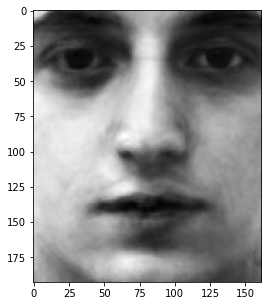

In [13]:
this_image = np.copy(images[32])
this_image = this_image.reshape(-1)
pcs_to_pass = e_vectors[:100]
pcs_to_pass = pcs_to_pass.T
pcs_to_pass = np.array(pcs_to_pass)
recon, mse = reconstruct_image(this_image, pcs_to_pass)
print(mse)
to_show = recon.reshape(193, 162)
plt.figure(figsize=[20,5])
plt.subplot(111);plt.imshow(to_show, cmap='gray');

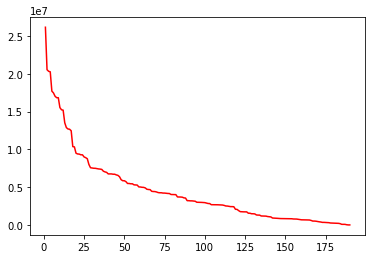

In [14]:
plt.plot(k_draw, mse_draw, color="red")

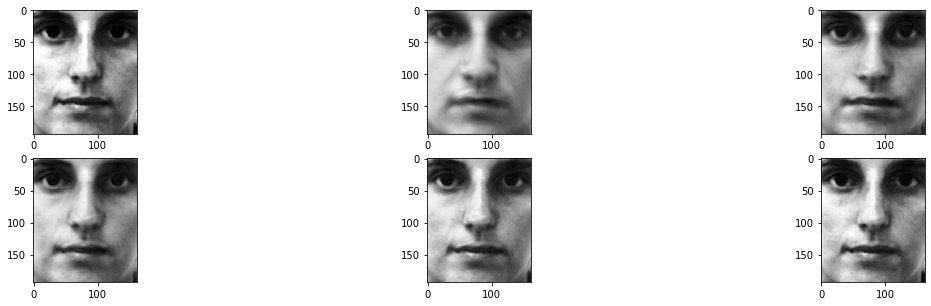

In [15]:
this_image1 = np.copy(images[58])
this_image1 = this_image1.reshape(-1)

pcs_to_pass1 = e_vectors[:30]
pcs_to_pass1 = pcs_to_pass1.T
pcs_to_pass1 = np.array(pcs_to_pass1)
recon1, mse1 = reconstruct_image(this_image1, pcs_to_pass1)
to_show1 = recon1.reshape(193, 162)

pcs_to_pass2 = e_vectors[:60]
pcs_to_pass2 = pcs_to_pass2.T
pcs_to_pass2 = np.array(pcs_to_pass2)
recon2, mse2 = reconstruct_image(this_image1, pcs_to_pass2)
to_show2 = recon2.reshape(193, 162)

pcs_to_pass3 = e_vectors[:90]
pcs_to_pass3 = pcs_to_pass3.T
pcs_to_pass3 = np.array(pcs_to_pass3)
recon3, mse3 = reconstruct_image(this_image1, pcs_to_pass3)
to_show3 = recon3.reshape(193, 162)

pcs_to_pass4 = e_vectors[:120]
pcs_to_pass4 = pcs_to_pass4.T
pcs_to_pass4 = np.array(pcs_to_pass4)
recon4, mse4 = reconstruct_image(this_image1, pcs_to_pass4)
to_show4 = recon4.reshape(193, 162)

pcs_to_pass5 = e_vectors[:150]
pcs_to_pass5 = pcs_to_pass5.T
pcs_to_pass5 = np.array(pcs_to_pass5)
recon5, mse5 = reconstruct_image(this_image1, pcs_to_pass5)
to_show5 = recon5.reshape(193, 162)

plt.figure(figsize=[20,5])
plt.subplot(231);plt.imshow(this_image1.reshape(193, 162), cmap='gray');
plt.subplot(232);plt.imshow(to_show1, cmap='gray');
plt.subplot(233);plt.imshow(to_show2, cmap='gray');
plt.subplot(234);plt.imshow(to_show3, cmap='gray');
plt.subplot(235);plt.imshow(to_show4, cmap='gray');
plt.subplot(236);plt.imshow(to_show5, cmap='gray');

<div>
    از این بخش می توان این نتیجه را گرفت که خب هر چه تعداد
    <br>
    principal component
    <br>
    را بیشتر کنیم، طبیعتا جزئیات بیشتری را می توانیم در نظر بگیریم و کیفیت تصویر خروجی بهتر می شود و به تصویر اصلی نزدیک تر می شود.
    ولی این مورد یک بدی دارد و آن این است که زمان محاسبه طبیعتا بیشتر می شود و باید یک تعادلی بین کیفیت و این زمان برقرار کنیم که من با قرار دادن دقت ۹۵ درصد و واریانس کمینه، برای این هدف به عدد ۶۰ رسیدم که یعنی اگر تعداد ۶۰ تا 
    <br>
    principal component
    <br>
    را داشته باشیم، هم دقت تا حد خوبی بالا است و هم زمان خوبی مصرف کرده ایم. ولی در کل هر چه تعداد 
    <br>
    pc
    <br>
    بیشتر باشد، دقت و جزئات بیشتر است و زمان هم بیشتر است و برعکس هر چه تعداد 
    <br>
    pc
    <br>
    کمتر باشد، دقت و جزئیات کمتر است و زمان کمتری هم مصرف می شود.
</div>

##  Smiling  images (10 points)

<div dir="rtl" style="font-size:18px">
    حال این بار تمام کار‌هایی که در بخش قبل )بخش ب( انجام دادید را تکرار کنید. 
    ولی این بار به جای عکس‌های رندم از چهره‌های عادی، عکس رندم از چهره‌های خندان انتخاب کنید.
    نتایج خود را از کار‌هایی که این بخش انجام دادید و از روی خروجی‌های بدست آمده شرح دهید.
    به نظرتان دلایل تفاوت خروجی‌ها در هر قسمت نسبت به قسمت قبل چیست؟
<div/>

117131810.52803859
33375921.346188165


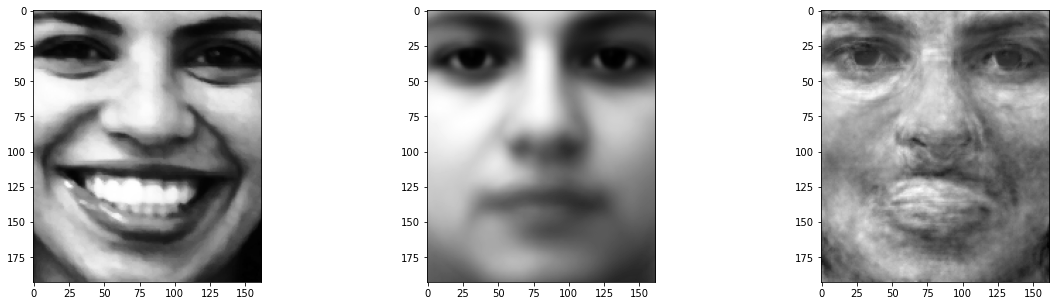

In [16]:
this_image = np.copy(images[75])
this_image = this_image.reshape(-1)
max_k = 0
max_mse = 0
max_recon = None
min_k = 200
min_mse = 9999999999
min_recon = None
k_draw = []
mse_draw = []
for i in range(1, 191):
    pcs_to_pass = e_vectors[:i]
    pcs_to_pass = pcs_to_pass.T
    pcs_to_pass = np.array(pcs_to_pass)
    recon, mse = reconstruct_image(this_image, pcs_to_pass)
    k_draw.append(i)
    mse_draw.append(mse)
    if mse > max_mse:
        max_k = i
        max_mse = mse
        max_recon = recon
    if mse < min_mse:
        min_k = i
        min_mse = mse
        min_recon = recon
print(max_mse)
print(min_mse)
to_show = max_recon.reshape(193, 162)
to_show_2 = min_recon.reshape(193, 162)
plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(this_image.reshape(193, 162), cmap="gray")
plt.subplot(132);plt.imshow(to_show, cmap='gray');
plt.subplot(133);plt.imshow(to_show_2, cmap='gray');

41843798.0709582


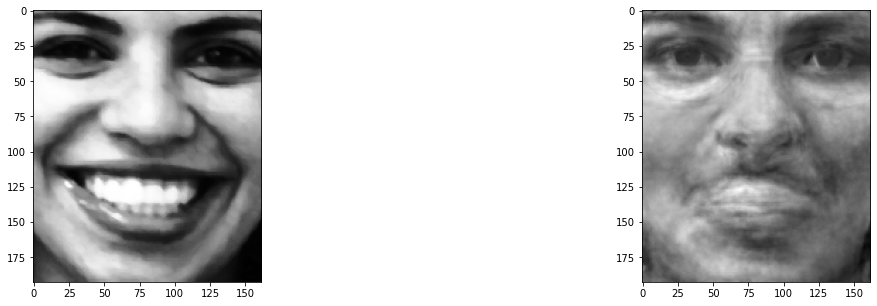

In [17]:
this_image = np.copy(images[75])
this_image = this_image.reshape(-1)
pcs_to_pass = e_vectors[:100]
pcs_to_pass = pcs_to_pass.T
pcs_to_pass = np.array(pcs_to_pass)
recon, mse = reconstruct_image(this_image, pcs_to_pass)
print(mse)
to_show = recon.reshape(193, 162)
plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(this_image.reshape(193, 162), cmap="gray")
plt.subplot(122);plt.imshow(to_show, cmap='gray');

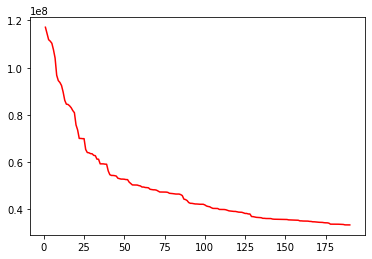

In [18]:
plt.plot(k_draw, mse_draw, color="red")

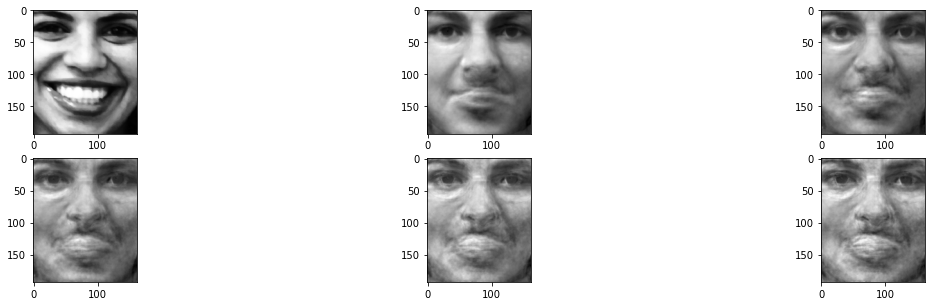

In [19]:
this_image1 = np.copy(images[75])
this_image1 = this_image1.reshape(-1)

pcs_to_pass1 = e_vectors[:30]
pcs_to_pass1 = pcs_to_pass1.T
pcs_to_pass1 = np.array(pcs_to_pass1)
recon1, mse1 = reconstruct_image(this_image1, pcs_to_pass1)
to_show1 = recon1.reshape(193, 162)

pcs_to_pass2 = e_vectors[:60]
pcs_to_pass2 = pcs_to_pass2.T
pcs_to_pass2 = np.array(pcs_to_pass2)
recon2, mse2 = reconstruct_image(this_image1, pcs_to_pass2)
to_show2 = recon2.reshape(193, 162)

pcs_to_pass3 = e_vectors[:90]
pcs_to_pass3 = pcs_to_pass3.T
pcs_to_pass3 = np.array(pcs_to_pass3)
recon3, mse3 = reconstruct_image(this_image1, pcs_to_pass3)
to_show3 = recon3.reshape(193, 162)

pcs_to_pass4 = e_vectors[:120]
pcs_to_pass4 = pcs_to_pass4.T
pcs_to_pass4 = np.array(pcs_to_pass4)
recon4, mse4 = reconstruct_image(this_image1, pcs_to_pass4)
to_show4 = recon4.reshape(193, 162)

pcs_to_pass5 = e_vectors[:150]
pcs_to_pass5 = pcs_to_pass5.T
pcs_to_pass5 = np.array(pcs_to_pass5)
recon5, mse5 = reconstruct_image(this_image1, pcs_to_pass5)
to_show5 = recon5.reshape(193, 162)

plt.figure(figsize=[20,5])
plt.subplot(231);plt.imshow(this_image1.reshape(193, 162), cmap='gray');
plt.subplot(232);plt.imshow(to_show1, cmap='gray');
plt.subplot(233);plt.imshow(to_show2, cmap='gray');
plt.subplot(234);plt.imshow(to_show3, cmap='gray');
plt.subplot(235);plt.imshow(to_show4, cmap='gray');
plt.subplot(236);plt.imshow(to_show5, cmap='gray');

<div>
    دلیل این تفاوت این است که ما کل فرآیند به اصطلاح 
    <br>
    train
    <br>
    را روی عکس های بدون خنده انجام دادیم و کل ماتریس های بازسازی و مقادیر ویژه، همین را یاد گرفته اند که عکس عادی را بازسازی کنند و چون حتی یک عکس دارای خنده 
    هم داخل داده های 
    <br>
    train
    <br>
    نبوده، به هیچ عنوان نمی تواند آن ها را بازسازی کند و بینیم که کلا هم 
    <br>
    MSE
    <br>
    بالاتر است و هم خروجی ها بسیار عجیب هستند مخصوصا در ناحیه لب که این تفاوت عکس دارای خنده با بدون خنده است.
</div>

## Reconstruction of test set (10 points)


<div dir="rtl" style="font-size:18px">
تا به اینجای کار ما با محاسبه MSE و بازسازی دوباره  عکس‌ها به  شهودی عددی و بصری از دقت فضای جدید یا همان  face space خود رسیدیم. اما نمی‌توان از این نکته چشم‌پوشی کرد که ارزیابی‌های ما از فضای جدید با استفاده از عکس‌هایی انجام شده که با آنها face space را ساخته‌ایم. در نتیجه این ارزیابی ما به نوعی biased است. برای ارزیابی بهتر MSE را بر روی تعدادی عکس که الگوریتم آنها را تا به حال ندیده است انجام داده و آنها را بازسازی می‌کنیم.
    <br/>
    در این قسمت یک عکس از ۱۰ عکس دیده نشده حالت طبیعی را انتخاب نموده و کارهای بخش ب را بر روی آن پیاده کنید. ارزیابی چه تفاوتی کرده است؟ نتیجه‌گیری کنید.
    <br/>
<div/>

52138314.81610793
7196847.903794398


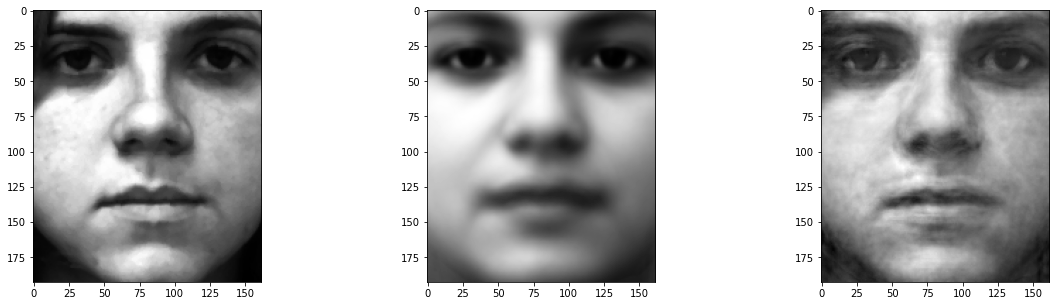

In [20]:
this_image = np.copy(images[396])
this_image = this_image.reshape(-1)
max_k = 0
max_mse = 0
max_recon = None
min_k = 200
min_mse = 9999999999
min_recon = None
k_draw = []
mse_draw = []
for i in range(1, 191):
    pcs_to_pass = e_vectors[:i]
    pcs_to_pass = pcs_to_pass.T
    pcs_to_pass = np.array(pcs_to_pass)
    recon, mse = reconstruct_image(this_image, pcs_to_pass)
    k_draw.append(i)
    mse_draw.append(mse)
    if mse > max_mse:
        max_k = i
        max_mse = mse
        max_recon = recon
    if mse < min_mse:
        min_k = i
        min_mse = mse
        min_recon = recon
print(max_mse)
print(min_mse)
to_show = max_recon.reshape(193, 162)
to_show_2 = min_recon.reshape(193, 162)
plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(this_image.reshape(193, 162), cmap="gray")
plt.subplot(132);plt.imshow(to_show, cmap='gray');
plt.subplot(133);plt.imshow(to_show_2, cmap='gray');

9149313.911844898


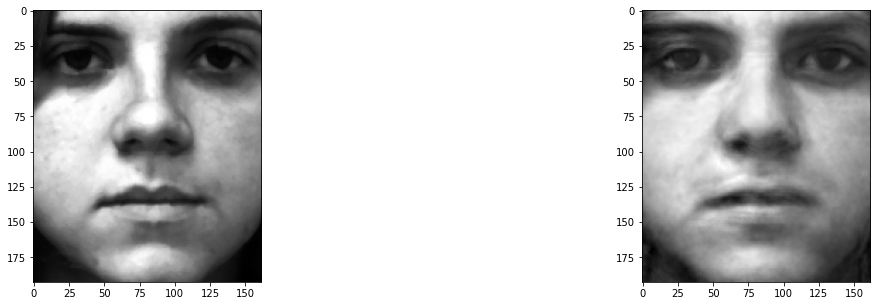

In [21]:
this_image = np.copy(images[396])
this_image = this_image.reshape(-1)
pcs_to_pass = e_vectors[:100]
pcs_to_pass = pcs_to_pass.T
pcs_to_pass = np.array(pcs_to_pass)
recon, mse = reconstruct_image(this_image, pcs_to_pass)
print(mse)
to_show = recon.reshape(193, 162)
plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(this_image.reshape(193, 162), cmap="gray")
plt.subplot(122);plt.imshow(to_show, cmap='gray');

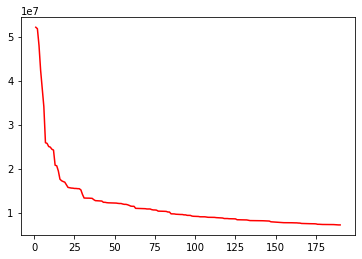

In [22]:
plt.plot(k_draw, mse_draw, color="red")

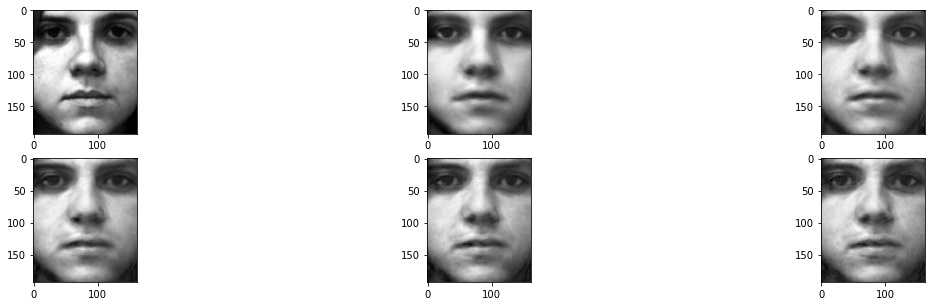

In [23]:
this_image1 = np.copy(images[396])
this_image1 = this_image1.reshape(-1)

pcs_to_pass1 = e_vectors[:30]
pcs_to_pass1 = pcs_to_pass1.T
pcs_to_pass1 = np.array(pcs_to_pass1)
recon1, mse1 = reconstruct_image(this_image1, pcs_to_pass1)
to_show1 = recon1.reshape(193, 162)

pcs_to_pass2 = e_vectors[:60]
pcs_to_pass2 = pcs_to_pass2.T
pcs_to_pass2 = np.array(pcs_to_pass2)
recon2, mse2 = reconstruct_image(this_image1, pcs_to_pass2)
to_show2 = recon2.reshape(193, 162)

pcs_to_pass3 = e_vectors[:90]
pcs_to_pass3 = pcs_to_pass3.T
pcs_to_pass3 = np.array(pcs_to_pass3)
recon3, mse3 = reconstruct_image(this_image1, pcs_to_pass3)
to_show3 = recon3.reshape(193, 162)

pcs_to_pass4 = e_vectors[:120]
pcs_to_pass4 = pcs_to_pass4.T
pcs_to_pass4 = np.array(pcs_to_pass4)
recon4, mse4 = reconstruct_image(this_image1, pcs_to_pass4)
to_show4 = recon4.reshape(193, 162)

pcs_to_pass5 = e_vectors[:150]
pcs_to_pass5 = pcs_to_pass5.T
pcs_to_pass5 = np.array(pcs_to_pass5)
recon5, mse5 = reconstruct_image(this_image1, pcs_to_pass5)
to_show5 = recon5.reshape(193, 162)

plt.figure(figsize=[20,5])
plt.subplot(231);plt.imshow(this_image1.reshape(193, 162), cmap='gray');
plt.subplot(232);plt.imshow(to_show1, cmap='gray');
plt.subplot(233);plt.imshow(to_show2, cmap='gray');
plt.subplot(234);plt.imshow(to_show3, cmap='gray');
plt.subplot(235);plt.imshow(to_show4, cmap='gray');
plt.subplot(236);plt.imshow(to_show5, cmap='gray');

<div>
    در این بخش چون داده ای داشتیم که در بخش 
    <br>
    train
    <br>
    آن را نداشتیم، پس 
    <br>
    MSE
    <br>
    مقداری بالاتر از حالت اولیه است ولی نسبت به حالت قبل که کلا عکس دارای خنده را این حرکت را رویش زده بودیم، این مقدار کمتر است و طبیعی هم هست که چرا 
    این اتفاق می افتد. نسبت به حالت اولیه بیشتر است چون اون اولیه داده بایاسد بود و در 
    <br>
    train
    <br>
    آن را داشتیم ولی این مورد را نداشتیم و برای همین هم مقداری 
    <br>
    MSE
    <br>
    بالاتر می رود ولی نه خیلی زیاد که باعث افت کیفیت خیلی زیاد شود و عکس را خراب کند. یعنی عکس بازسازی شده، کاملا 
    واضح است که شبیه عکس اولیه است. و از طرفی چون این نوع عکس، بدون خنده بوده و بسیار شبیه به داده های 
    <br>
    train
    <br>
    بوده است، از حالت قبل که برای عکس با خنده رفتیم، مقدار 
    <br>
    Mean Squared Error
    <br>
    به میزان قابل توجهی کمتر بوده و برعکس حالت قبل، این حالت عکس را خراب نمیکند.
</div>

## Reconstruction of non-human image (10 points)

<div dir="rtl" style="font-size:18px">
دو عکس غیر از چهره انسان و به دلخواه خود )مثل عکس ماشین یا پرنده( را در نظر گرفته.
    نخست عملیات‌های لازم مثل سیاه سفید کردن یا تغییر سایز را انجام دهید.
    سپس با استفاده از تمام PCها 
    سعی بر بازسازی آن داشته باشید و MSE را محاسبه نمایید.
    <br/>
    آیا الگوریتم به اندازه عکس چهره‌ها موفق عمل کرد؟‌ چرا؟ نتیجه‌گیری کنید.
    <br/>
<div/>

mse for car:  71691517.34758915
mse for lion:  243218783.3427109


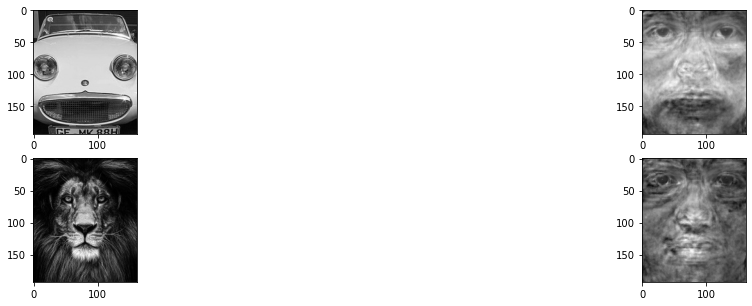

In [24]:
car = cv2.imread("./car.jpg")
car = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
lion = cv2.imread("./lion.jpg")
lion = cv2.cvtColor(lion, cv2.COLOR_BGR2GRAY)

car = car.reshape(-1)
lion = lion.reshape(-1)

pcs_to_pass = e_vectors[:190]
pcs_to_pass = pcs_to_pass.T
pcs_to_pass = np.array(pcs_to_pass)

recon_car, mse_car = reconstruct_image(car, pcs_to_pass)
recon_lion, mse_lion = reconstruct_image(lion, pcs_to_pass)

print("mse for car: ", mse_car)
print("mse for lion: ", mse_lion)

to_show_car = recon_car.reshape(193, 162)
to_show_lion = recon_lion.reshape(193, 162)

plt.figure(figsize=[20,5])
plt.subplot(221);plt.imshow(car.reshape(193, 162), cmap="gray")
plt.subplot(222);plt.imshow(to_show_car, cmap='gray');
plt.subplot(223);plt.imshow(lion.reshape(193, 162), cmap="gray")
plt.subplot(224);plt.imshow(to_show_lion, cmap='gray');

<div dir="rtl">
    همانطور که قطعا انتظار می رفت، کلا ویژگی ها و فیچر هایی که این حالت برای بازسازی یاد می گیرد، مربوط به ویژگی های چهره انسان است و 
    قطعا می دانیم که ماشین و یا حیوانات، دارای کاملا حالات متفاوت هستند و برای همین هم MSE بسیار بالا می شود و هم خروجی های بازسازی شده، هیچ شباهتی به 
    عکس های واقعی ندارند و در واقع کلا بردار ویژه ها و conv ای که ساختیم، مربوط به انسان آن هم بدون خنده و ... بود و برای همین 
    این خروجی ها اصلا شبیه نه انسان هستند و نه شیر و نه ماشین.
</div>

## Image Rotation (10 points)

<div dir="rtl" style="font-size:18px">
    حال یکی از عکس‌های دیتاستی که تا الان روی آن کار کردیم )شامل 190 عکس طبیعی( را به صورت رندم انتخاب کنید. برای آن عکس تمام rotationهای ممکن
    )از 0 تا 360( را انجام دهید.
    حال روی هر یک از عکس‌های بدست آمده با استفاده از تمام PCها عملیات بازسازی و محاسبه‌ی MSE را انجام دهید.
    <br/>
    نمودار MSE بر حسب درجه‌ی چرخش را رسم کنید.
    <br/>
    برای 10 درجه به صورت یکنواخت بین 360 و 0، عکس اصلی، عکس بعد از دوران، عکس بازسازی‌شده به کمک الگوریتم را رسم کنید.
    <br/>
    نتایج به دست آمده را تحلیل کنید. آیا MSE در حالت 360 درجه دوران با حالت 0 برابر است؟
    چرا؟
    <br/>
    <br/>
    <font color=blue>
    با استفاده از ndimage میتوانید عکس های خود را بچرخانید.
        <font/>
        <br/>
<div/>

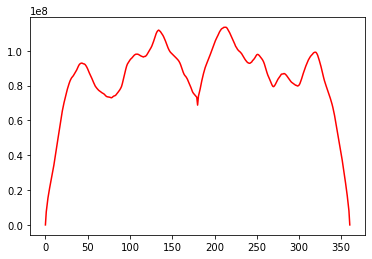

In [25]:
from scipy import ndimage

this_image = np.copy(images[100])
pcs_to_pass = e_vectors[:190]
pcs_to_pass = pcs_to_pass.T
pcs_to_pass = np.array(pcs_to_pass)

mse_list = []
degree_list = []

for i in range(361):
    rotated = ndimage.rotate(this_image, i, reshape=False)
    rotated = rotated.reshape(-1)
    reconr, mse = reconstruct_image(rotated, pcs_to_pass)
    mse_list.append(mse)
    degree_list.append(i)
    
plt.plot(degree_list, mse_list, color="red")

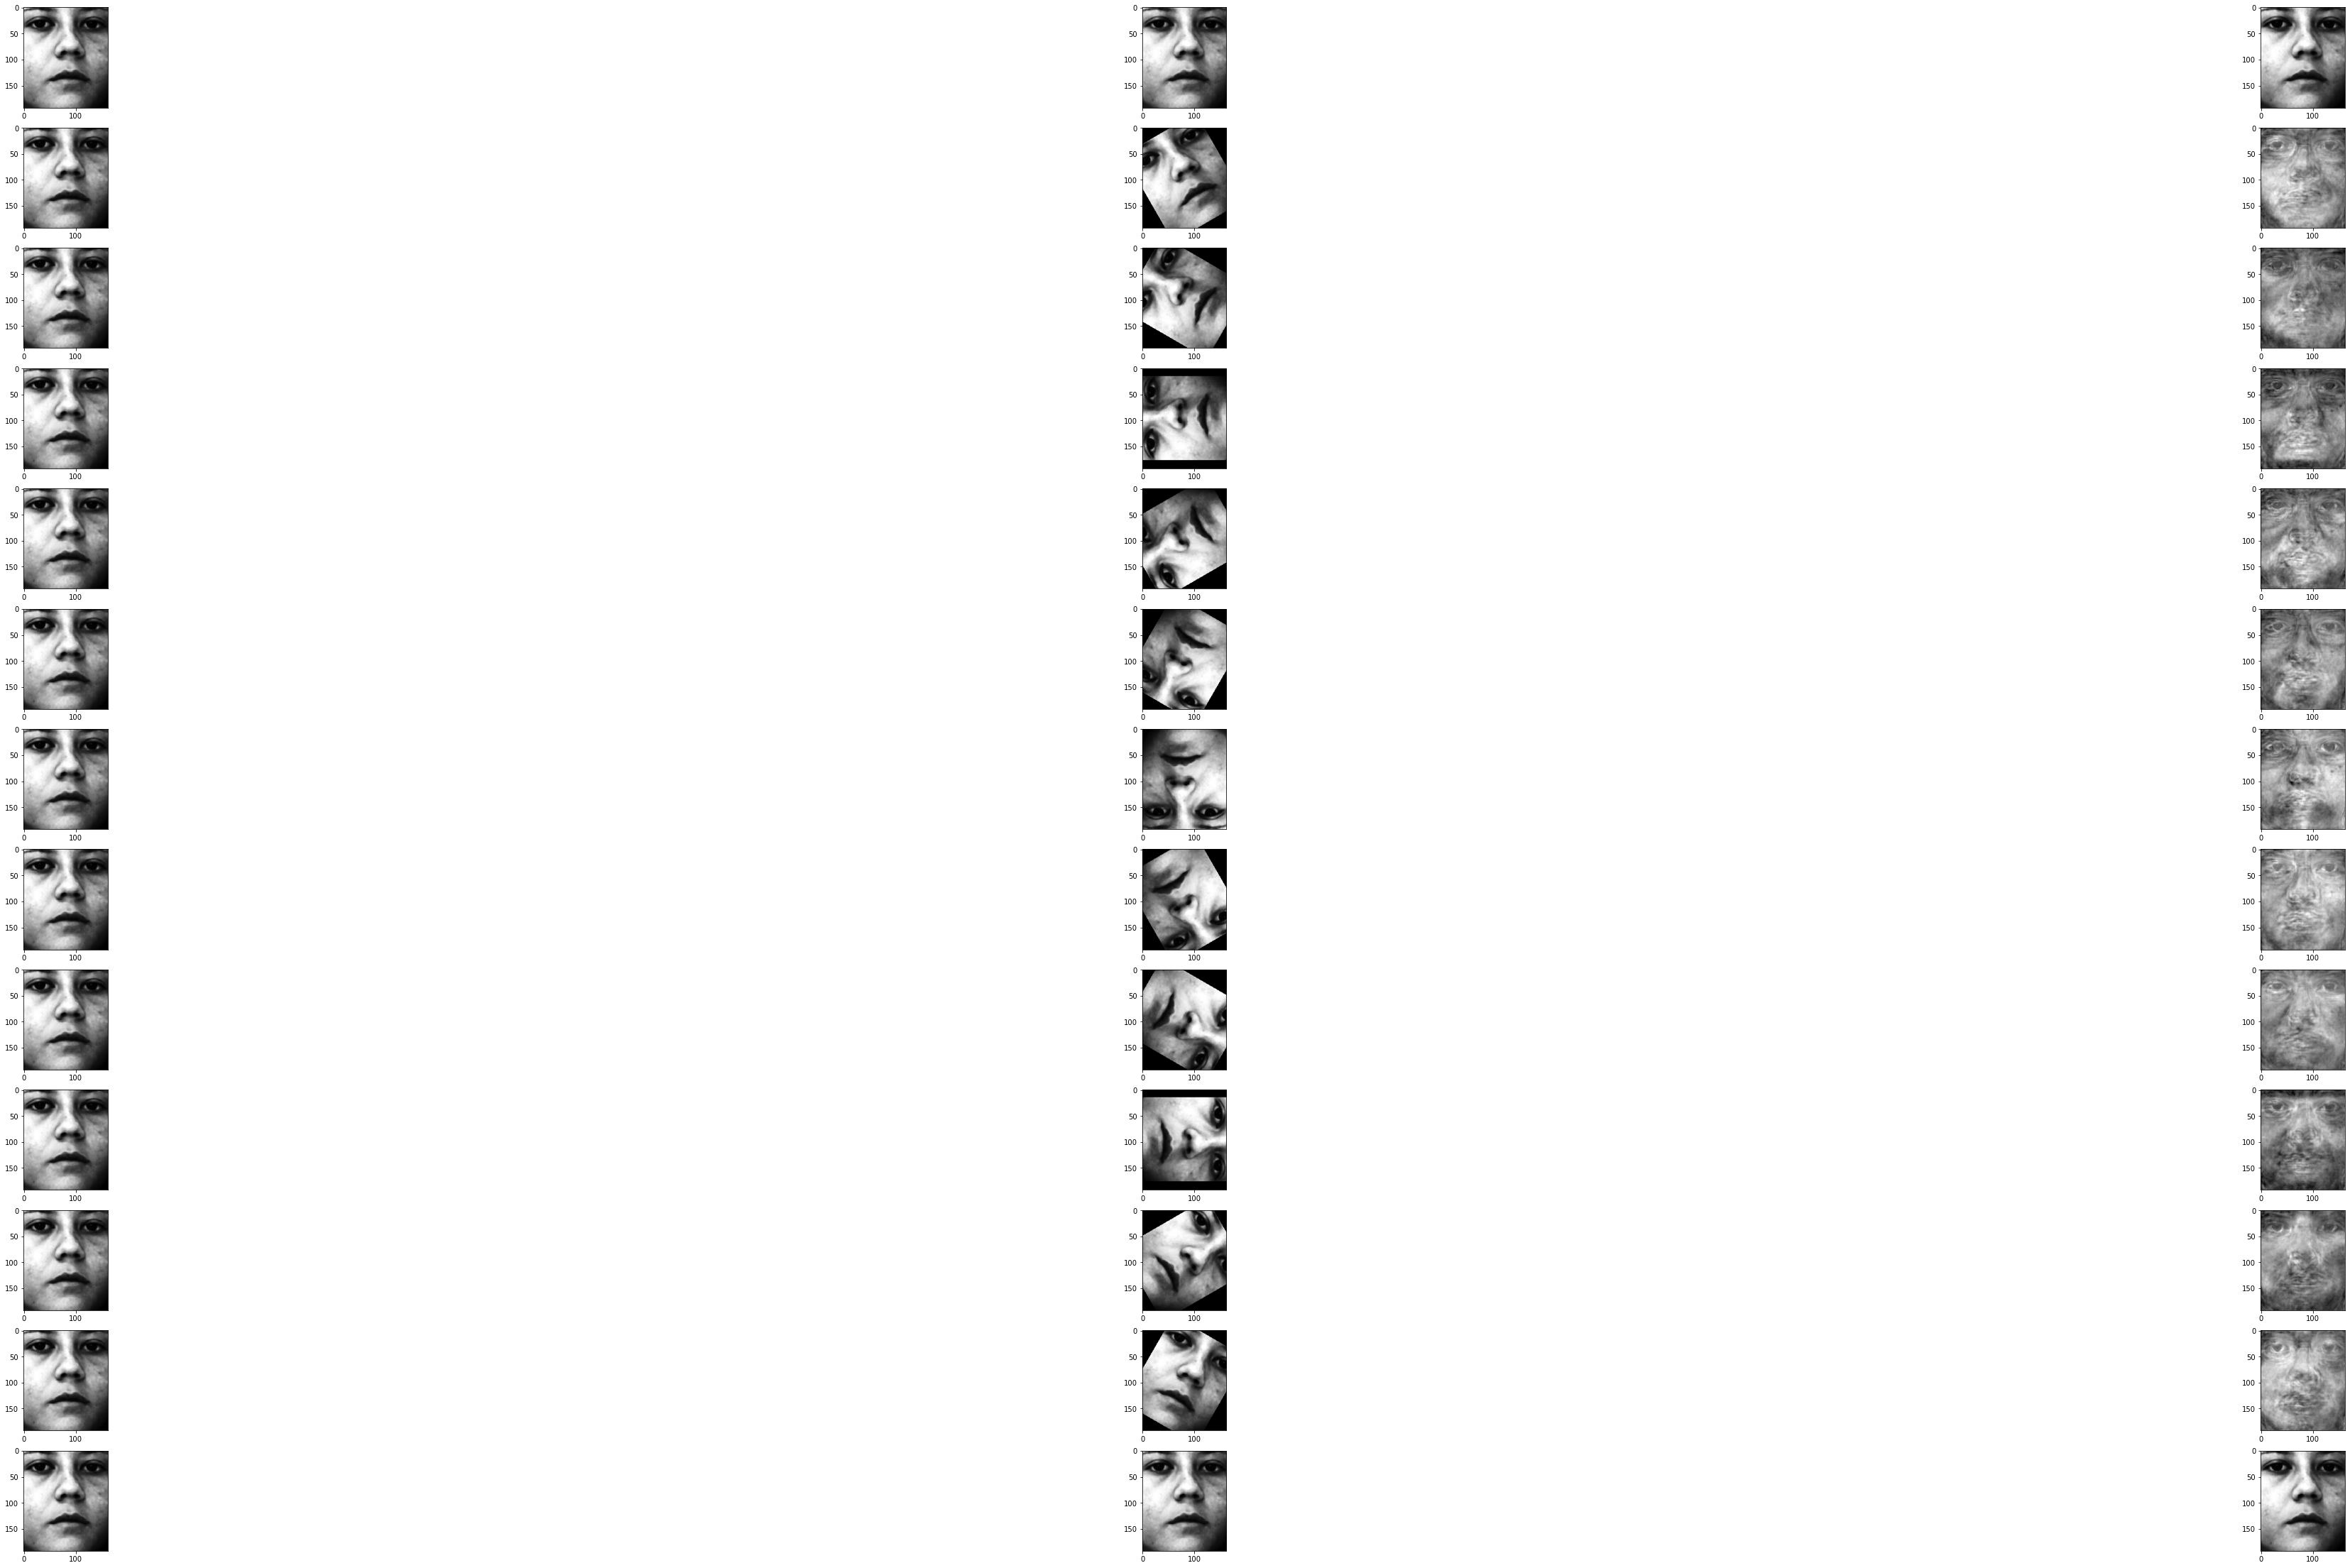

In [26]:
this_image = np.copy(images[100])
pcs_to_pass = e_vectors[:190]
pcs_to_pass = pcs_to_pass.T
pcs_to_pass = np.array(pcs_to_pass)

plt.figure(figsize=[80,40])

counter = 1
for i in range(0, 361, 30):
    rotated = ndimage.rotate(this_image, i, reshape=False)
    plt.subplot(13, 3, counter);plt.imshow(this_image, cmap="gray")
    counter += 1
    plt.subplot(13, 3, counter);plt.imshow(rotated, cmap='gray');
    counter += 1
    rotated = rotated.reshape(-1)
    recon, mse = reconstruct_image(rotated, pcs_to_pass)
    plt.subplot(13, 3, counter);plt.imshow(recon.reshape(193, 162), cmap='gray');
    counter += 1

In [27]:
this_image = np.copy(images[120])
pcs_to_pass = e_vectors[:190]
pcs_to_pass = pcs_to_pass.T
pcs_to_pass = np.array(pcs_to_pass)

rotated = ndimage.rotate(this_image, 0, reshape=False)
rotated = rotated.reshape(-1)
recon, mse = reconstruct_image(rotated, pcs_to_pass)
print("mse for 0 degree: ", mse)

rotated = ndimage.rotate(this_image, 360, reshape=False)
rotated = rotated.reshape(-1)
recon, mse = reconstruct_image(rotated, pcs_to_pass)
print("mse for 360 degree: ", mse)

mse for 0 degree:  4.933620318070297e-22
mse for 360 degree:  4.933620318070297e-22


<div dir="rtl">
    از آنجایی که rotete با ۰ درجه و ۳۶۰ درج، دقیقا یک عکس می شوند، پس خروجی آن ها هم یکسان می شود و دقیقا MSE برابر دارند.
    برای تحلیل این خروجی ها، خب چون باز هم دیتاست train ما فقط شامل صورت با عمودی است و rotate ندارد، پس چیزی که یاد می گیرد 
    و بردار ویژه هایی که می سازد، صرفا برای باز تولید عکس های عمودی است و اگر عکس rotate ؤده به آن بدهیم، درست کار نمیکند و هم MSE إسیار بالایی دارد و 
    و هم خروجی بسیار بد می شود.
</div>

## Face Recognition (10 point)

<div dir="rtl" style="font-size:18px">
    در این قسمت شما باید Face Recognition را تکمیل کنید. به این معنا که کد شما باید این قابلیت را داشته باشد که پس از اجرای PCA ، تصویر‌ها را پشت سر هم ورودی بگیرد ، و بعد از گرفتن هر تصویر بگوید که آیا این شخص را قبلا دیده است یا نه.
    <br/>
    برای اینکار لازم است به این صورت عمل کنید. در ابتدا 10 تا از بهترین پایه های فضا را انتخاب کنید. سپس هر تصویری که به شما داده میشود را میتوانید به صورت یک بردار 10 تایی از ضرایب نشان داد. که برای هر تصویر این ضریب منحصر به فرد میباشد. حال اگر برای 2 بردار 10 تایی خاص ، این ضرایب به اندازه کافی به هم نزدیک باشند میتوانیم بگوییم که تصویر متعلق به یک شخص میباشد.
    <br/>
<div/>

obama1 and obama2 are identical
obama1 and unknown face are not identical


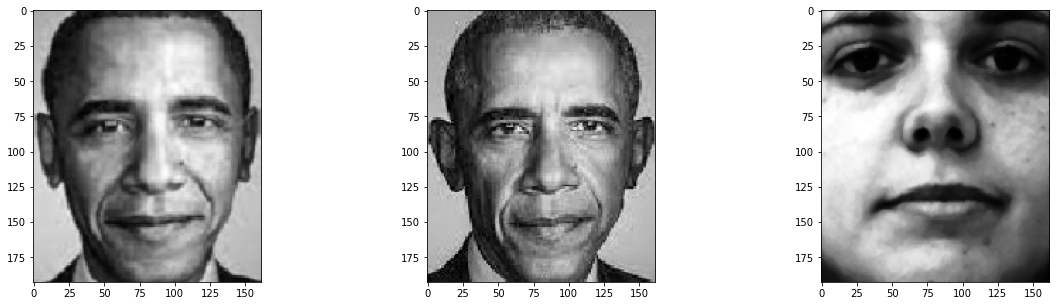

In [28]:
this_image = cv2.imread("./obama1.jfif")
this_image = cv2.cvtColor(this_image, cv2.COLOR_BGR2GRAY)
obama1 = this_image
pcs_to_pass = e_vectors[:10]
pcs_to_pass = pcs_to_pass.T
pcs_to_pass = np.array(pcs_to_pass)
this_image = this_image.reshape(-1)
obama1_weights = np.matmul(pcs_to_pass.T, this_image)

this_image = cv2.imread("./obama2.jfif")
this_image = cv2.cvtColor(this_image, cv2.COLOR_BGR2GRAY)
obama2 = this_image
pcs_to_pass = e_vectors[:10]
pcs_to_pass = pcs_to_pass.T
pcs_to_pass = np.array(pcs_to_pass)
this_image = this_image.reshape(-1)
obama2_weights = np.matmul(pcs_to_pass.T, this_image)

this_image = images[2]
unknown_face = this_image
pcs_to_pass = e_vectors[:10]
pcs_to_pass = pcs_to_pass.T
pcs_to_pass = np.array(pcs_to_pass)
this_image = this_image.reshape(-1)
unknown = np.matmul(pcs_to_pass.T, this_image)

difference1 = np.sum((obama1_weights - obama2_weights) ** 2)
difference2 = np.sum((obama1_weights - unknown) ** 2)

if (difference1 < 5000000):
    print("obama1 and obama2 are identical")
else:
    print("obama1 and obama2 are not identical")
if (difference2 < 5000000):
    print("obama1 and unknown face are identical")
else:
    print("obama1 and unknown face are not identical")
    
plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(obama1, cmap="gray")
plt.subplot(132);plt.imshow(obama2, cmap='gray');
plt.subplot(133);plt.imshow(unknown_face, cmap="gray")

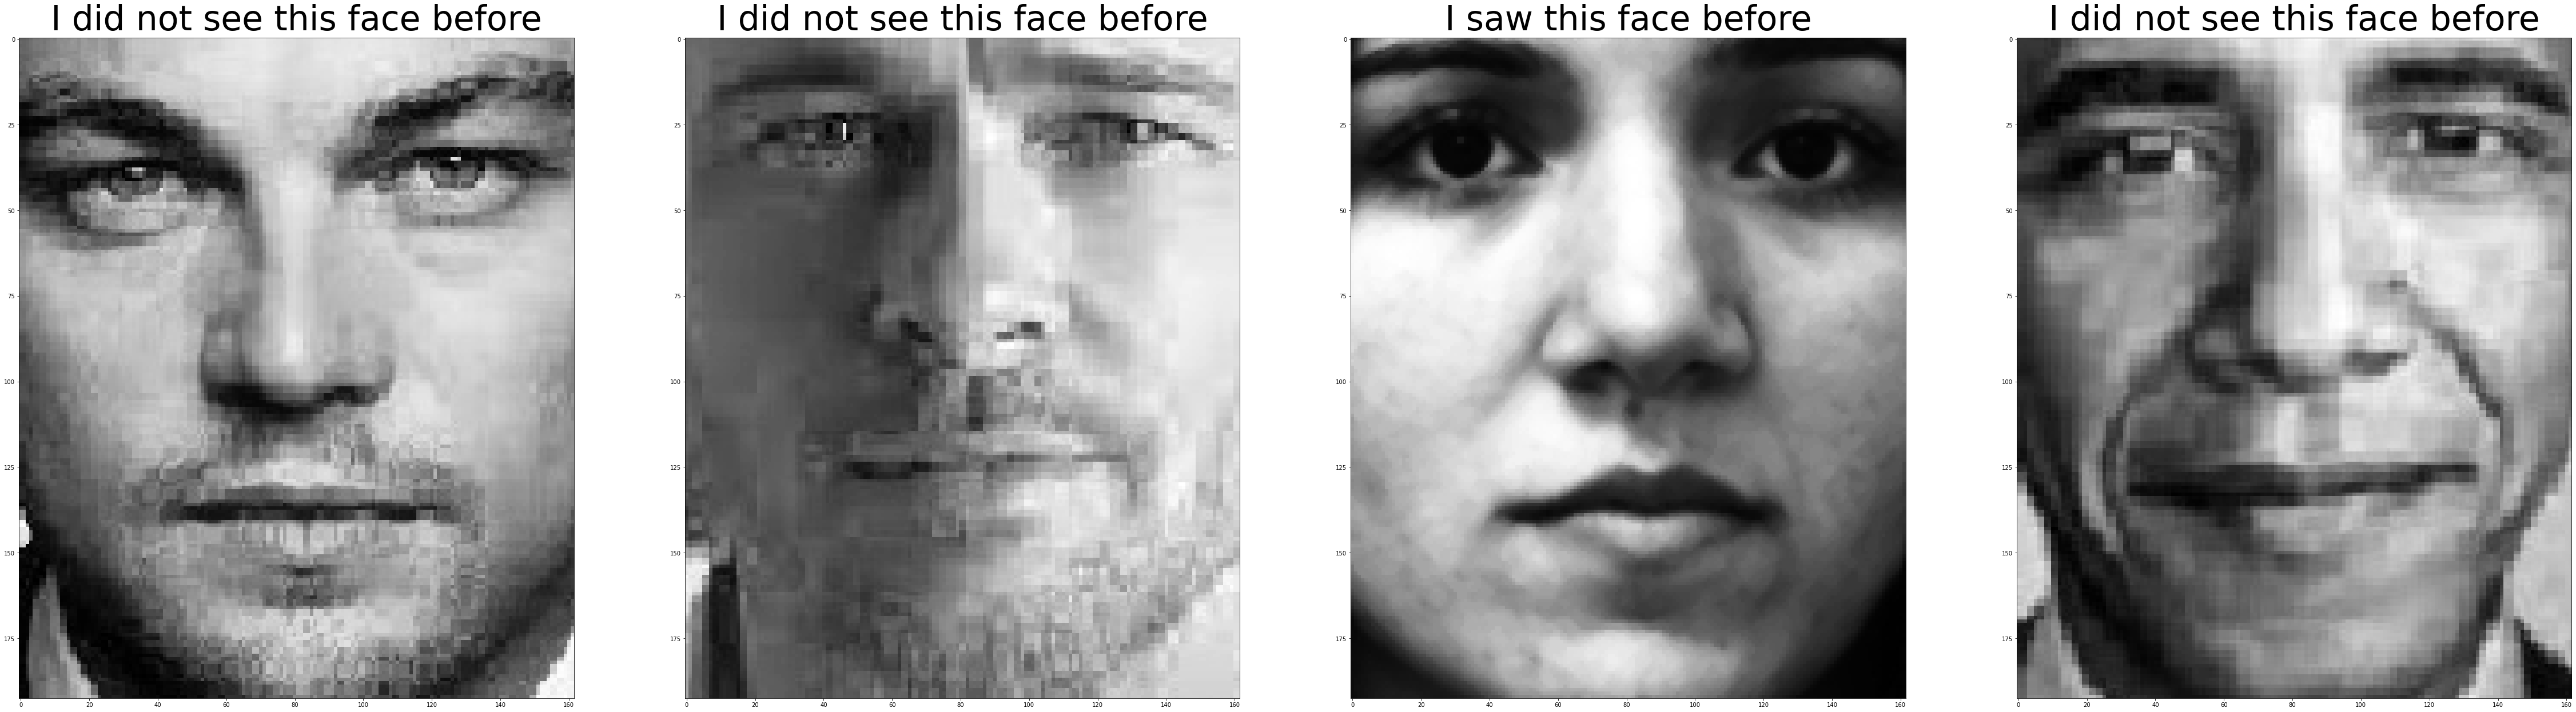

In [29]:
pcs_to_pass = e_vectors[:10]
pcs_to_pass = pcs_to_pass.T
pcs_to_pass = np.array(pcs_to_pass)
plt.figure(figsize=[80,40])

this_image = cv2.imread("./unknown1.jfif")
this_image = cv2.cvtColor(this_image, cv2.COLOR_BGR2GRAY)
this_image = this_image.reshape(-1)
recon, mse = reconstruct_image(this_image, pcs_to_pass)
if mse < 100000000:
    plt.subplot(1, 4, 1);plt.imshow(this_image.reshape(193, 162), cmap="gray");plt.title("I saw this face before", fontdict={'fontsize': 60})
else:
    plt.subplot(1,4,1);plt.imshow(this_image.reshape(193,162),cmap="gray");plt.title("I did not see this face before", fontdict={'fontsize': 60})

this_image = cv2.imread("./unknown2.jfif")
this_image = cv2.cvtColor(this_image, cv2.COLOR_BGR2GRAY)
this_image = this_image.reshape(-1)
recon, mse = reconstruct_image(this_image, pcs_to_pass)
if mse < 100000000:
    plt.subplot(1, 4, 2);plt.imshow(this_image.reshape(193, 162), cmap="gray");plt.title("I saw this face before", fontdict={'fontsize': 60})
else:
    plt.subplot(1,4,2);plt.imshow(this_image.reshape(193,162),cmap="gray");plt.title("I did not see this face before", fontdict={'fontsize': 60})

this_image = np.copy(images[10])
this_image = this_image.reshape(-1)
recon, mse = reconstruct_image(this_image, pcs_to_pass)
if mse < 100000000:
    plt.subplot(1, 4, 3);plt.imshow(this_image.reshape(193, 162), cmap="gray");plt.title("I saw this face before", fontdict={'fontsize': 60})
else:
    plt.subplot(1,4,3);plt.imshow(this_image.reshape(193,162),cmap="gray");plt.title("I did not see this face before", fontdict={'fontsize': 60})

this_image = cv2.imread("./unknown3.jfif")
this_image = cv2.cvtColor(this_image, cv2.COLOR_BGR2GRAY)
this_image = this_image.reshape(-1)
recon, mse = reconstruct_image(this_image, pcs_to_pass)
if mse < 100000000:
    plt.subplot(1, 4, 4);plt.imshow(this_image.reshape(193, 162), cmap="gray");plt.title("I saw this face before", fontdict={'fontsize': 60})
else:
    plt.subplot(1,4,4);plt.imshow(this_image.reshape(193,162),cmap="gray");plt.title("I did not see this face before", fontdict={'fontsize': 60})